### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## extracting sst hovmollers here:
/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields


In [13]:
### extract year lists
def make_yearlist_tom(yrst, yrend, dtype, baseDir = '/gpfs/data/greenocean/software/runs/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}//ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def make_yearlist_ukesm(yrst, yren, tscen, dtype = 'grid-T'):
    print(f'SCENARIO {tscen}')
    dslist = []

#     tdir = 
    for y in range(yrst,yren+1):
        
        tdir = '/gpfs/data/greenocean/software/resources/MEDUSA/ukesm_allscen_gridT_TS/'
        td = glob.glob(f'{tdir}nemo_scen_{tscen}_1m_{y}_fy_grid-T.nc')
        dslist.append(td[0])
#         except:
#             pass
    return dslist

tommesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tommesh['area'] = tommesh.tmask[0,0,:,:] * tommesh.e1t[0,:,:] * tommesh.e2t[0,:,:]
#ukesm area 
ukmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask_eORCA1_wrk.nc')
ukmesh['area'] = ukmesh.tmask[0,:,:] * mm_med.e1t[:,:] * mm_med.e2t[:,:]

def get_ts_3d(startyr,endyr,scenUKESM,dtypeUKESM,dtypeTOM, baseDirTOM,varUKESM,varTOM,lev = 0):
    ukesm = xr.open_mfdataset(make_yearlist_ukesm(startyr,endyr,scenUKESM,dtypeUKESM))
    tom = xr.open_mfdataset(make_yearlist_tom(startyr,endyr,dtypeTOM, baseDirTOM))
    ukesmvar = ukesm[varUKESM] #surface
    tomvar = tom[varTOM] #surface

    print('nazdar')
    ukesm_latmax = 140
    tom_latmax = 50
    ukesm_so = ukesmvar[:,lev,0:ukesm_latmax,:].weighted(ukmesh['area'][0:ukesm_latmax,:]).mean(dim = ['x'])
    tom_so = tomvar[:,lev,0:tom_latmax,:].weighted(tommesh['area'][0:tom_latmax,:]).mean(dim = ['x'])
    print('yes')
    
    rdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/'
    tnam_ukesm = f'{rdir}/SST_{scenUKESM}_ukesm_{startyr}-{endyr}.nc'
    tnam_tom = f'{rdir}/SST_{scenUKESM}_tom_{startyr}-{endyr}.nc'
    
    ukesm_so.to_netcdf(tnam_ukesm)
    tom_so.to_netcdf(tnam_tom)
    
    return ukesm_so, tom_so

In [15]:
###
startyr = 1950
endyr = 2099

extract = True
if extract:

    scenUKESM = '2B'
    nameTOM = 'TOM12_TJ_2BA6'
    baseDirTOM = f'/gpfs/data/greenocean/software/runs/{nameTOM}/'
    varUKESM = 'thetao'
    varTOM = 'votemper'
    ukesm_so, tom_so = get_ts_3d(startyr,endyr,scenUKESM,dtypeUKESM,dtypeTOM, baseDirTOM,varUKESM,varTOM)

    scenUKESM = '3B'
    nameTOM = 'TOM12_TJ_3BA6'
    baseDirTOM = f'/gpfs/data/greenocean/software/runs/{nameTOM}/'
    varUKESM = 'thetao'
    varTOM = 'votemper'
    ukesm_so, tom_so = get_ts_3d(startyr,endyr,scenUKESM,dtypeUKESM,dtypeTOM, baseDirTOM,varUKESM,varTOM)

    scenUKESM = '2A'
    nameTOM = 'TOM12_TJ_2AA6'
    baseDirTOM = f'/gpfs/data/greenocean/software/runs/{nameTOM}/'
    varUKESM = 'thetao'
    varTOM = 'votemper'
    ukesm_so, tom_so = get_ts_3d(startyr,endyr,scenUKESM,dtypeUKESM,dtypeTOM, baseDirTOM,varUKESM,varTOM)

    scenUKESM = '3A'
    nameTOM = 'TOM12_TJ_3AA6'
    baseDirTOM = f'/gpfs/data/greenocean/software/runs/{nameTOM}/'
    varUKESM = 'thetao'
    varTOM = 'votemper'
    ukesm_so, tom_so = get_ts_3d(startyr,endyr,scenUKESM,dtypeUKESM,dtypeTOM, baseDirTOM,varUKESM,varTOM)



SCENARIO 2B
nazdar
yes
SCENARIO 3B


KeyboardInterrupt: 

In [48]:
w = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/ukesm_allscen_gridT_TS/nemo_scen_3A_1m_1990_fy_grid-T.nc')

tlat = w.nav_lat[40:140,100].values

tlats = [tlat[0],tlat[20],tlat[40],tlat[60],tlat[80],tlat[99]]
tinds = [0,20,40,60,80,99]


mm_tom = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
mm_tom['area'] = mm_tom.tmask[0,0,:,:] * mm_tom.e1t[0,:,:] * mm_tom.e2t[0,:,:]
tlat = mm_tom.nav_lat[0:50,100].values

tlatstom = [tlat[0],tlat[10],tlat[20],tlat[30],tlat[40],tlat[49]]
tindstom = [0,10,20,30,40,49]


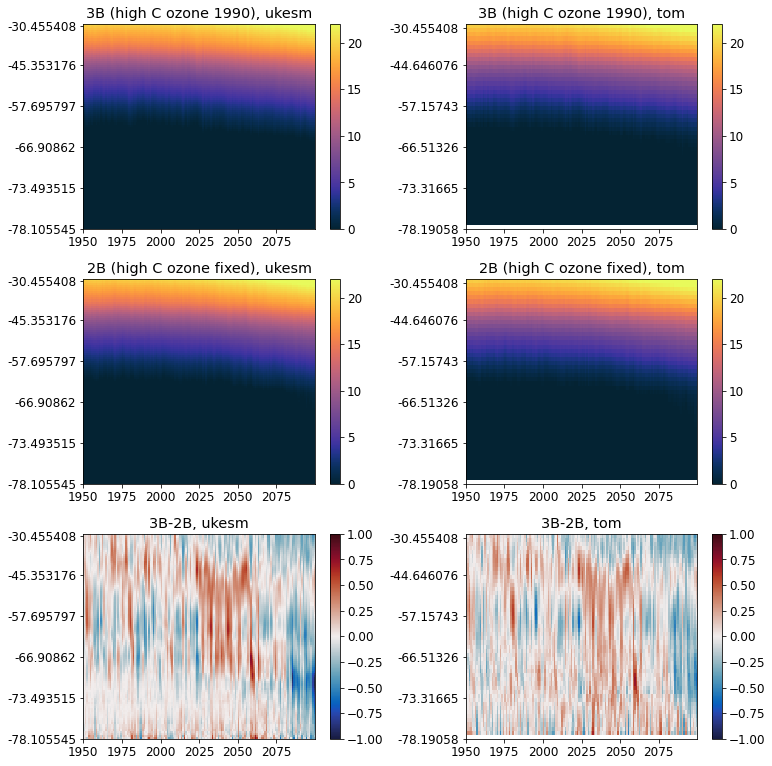

In [66]:
tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/'

uk3B = 'SST_3B_ukesm_1950-2099.nc'
uk3Bar = xr.open_dataset(f'{tdir}/{uk3B}')
#t = w.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T



fact = 0.9
fig, axs = plt.subplots(3,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k', sharey= False)
axs = axs.ravel()

uk3B = 'SST_3B_ukesm_1950-2099.nc'
uk3Bar = xr.open_dataset(f'{tdir}/{uk3B}')
uk3Bdat = uk3Bar.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T
w = axs[0].pcolormesh(uk3Bdat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[0])


uk2B = 'SST_2B_ukesm_1950-2099.nc'
uk2Bar = xr.open_dataset(f'{tdir}/{uk2B}')
uk2Bdat = uk2Bar.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T
w = axs[2].pcolormesh(uk2Bdat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[2])

w = axs[4].pcolormesh(uk3Bdat-uk2Bdat, cmap = cm.balance, vmin = -1, vmax = 1)
plt.colorbar(w, ax = axs[4])

#
tom3B = 'SST_3B_tom_1950-2099.nc'
tom3Bar = xr.open_dataset(f'{tdir}/{tom3B}')
tom3Bdat = tom3Bar.__xarray_dataarray_variable__.isel(y=slice(0,50)).groupby('time_counter.year').mean().T
w = axs[1].pcolormesh(tom3Bdat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[1])


tom2B = 'SST_2B_tom_1950-2099.nc'
tom2Bar = xr.open_dataset(f'{tdir}/{tom2B}')
tom2Bdat = tom2Bar.__xarray_dataarray_variable__.isel(y=slice(0,50)).groupby('time_counter.year').mean().T
w = axs[3].pcolormesh(tom2Bdat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[3])

w = axs[5].pcolormesh(tom3Bdat-tom2Bdat, cmap = cm.balance, vmin = -1, vmax = 1)
plt.colorbar(w, ax = axs[5])

ax = axs[5]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)
ax = axs[1]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)
ax = axs[3]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)


titles = ['3B (high C ozone 1990), ukesm', '3B (high C ozone 1990), tom',\
         '2B (high C ozone fixed), ukesm', '2B (high C ozone fixed), tom',\
         '3B-2B, ukesm', '3B-2B, tom']

for i in range(0,6):

    if i%2 == 0:
        axs[i].set_yticks(tinds)
        q = axs[i].set_yticklabels(tlats)
    axs[i].set_title(titles[i])
    axs[i].set_xticks(np.arange(0,150,25))
    axs[i].set_xticklabels(np.arange(1950,2100,25))


plt.tight_layout()

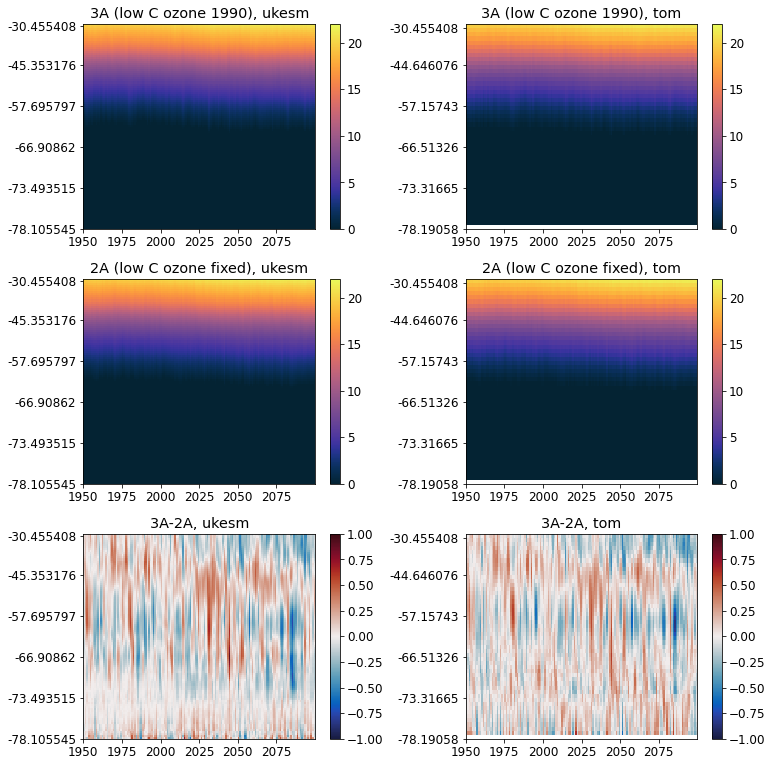

In [67]:
tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/'

uk3A = 'SST_3A_ukesm_1950-2099.nc'
uk3Aar = xr.open_dataset(f'{tdir}/{uk3A}')
#t = w.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T



fact = 0.9
fig, axs = plt.subplots(3,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k', sharey= False)
axs = axs.ravel()

uk3A = 'SST_3A_ukesm_1950-2099.nc'
uk3Aar = xr.open_dataset(f'{tdir}/{uk3A}')
uk3Adat = uk3Aar.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T
w = axs[0].pcolormesh(uk3Adat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[0])


uk2A = 'SST_2A_ukesm_1950-2099.nc'
uk2Aar = xr.open_dataset(f'{tdir}/{uk2A}')
uk2Adat = uk2Aar.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T
w = axs[2].pcolormesh(uk2Adat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[2])

w = axs[4].pcolormesh(uk3Adat-uk2Adat, cmap = cm.balance, vmin = -1, vmax = 1)
plt.colorbar(w, ax = axs[4])

#
tom3A = 'SST_3A_tom_1950-2099.nc'
tom3Aar = xr.open_dataset(f'{tdir}/{tom3A}')
tom3Adat = tom3Aar.__xarray_dataarray_variable__.isel(y=slice(0,50)).groupby('time_counter.year').mean().T
w = axs[1].pcolormesh(tom3Adat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[1])


tom2A = 'SST_2A_tom_1950-2099.nc'
tom2Aar = xr.open_dataset(f'{tdir}/{tom2A}')
tom2Adat = tom2Aar.__xarray_dataarray_variable__.isel(y=slice(0,50)).groupby('time_counter.year').mean().T
w = axs[3].pcolormesh(tom2Adat, cmap = cm.thermal, vmin = 0, vmax = 22)
plt.colorbar(w, ax = axs[3])

w = axs[5].pcolormesh(tom3Adat-tom2Adat, cmap = cm.balance, vmin = -1, vmax = 1)
plt.colorbar(w, ax = axs[5])

ax = axs[5]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)
ax = axs[1]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)
ax = axs[3]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)


titles = ['3A (low C ozone 1990), ukesm', '3A (low C ozone 1990), tom',\
         '2A (low C ozone fixed), ukesm', '2A (low C ozone fixed), tom',\
         '3A-2A, ukesm', '3A-2A, tom']

for i in range(0,6):

    if i%2 == 0:
        axs[i].set_yticks(tinds)
        q = axs[i].set_yticklabels(tlats)
    axs[i].set_title(titles[i])
    axs[i].set_xticks(np.arange(0,150,25))
    axs[i].set_xticklabels(np.arange(1950,2100,25))

plt.tight_layout()

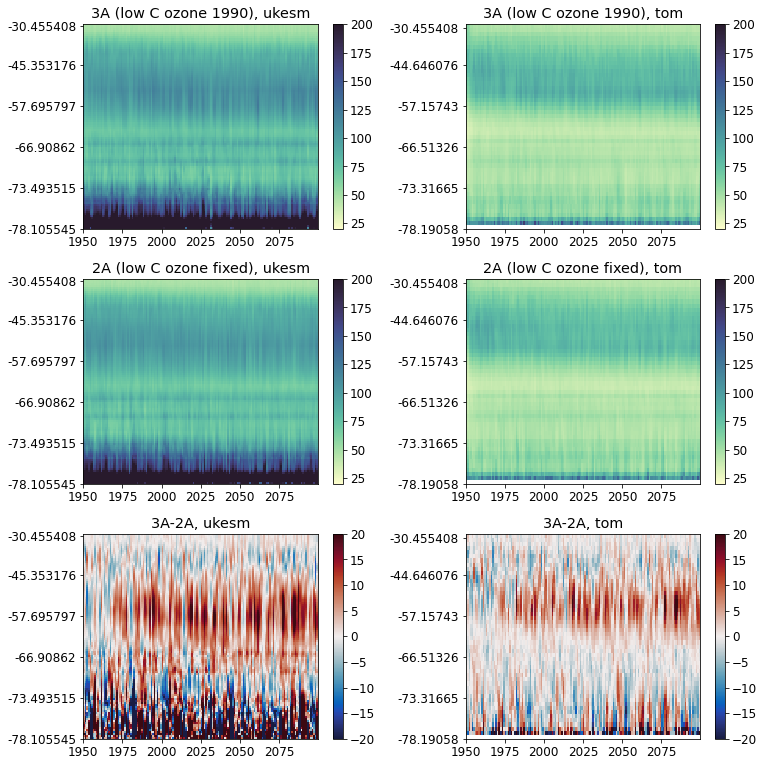

In [73]:
tdir = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/oceanFields/extracted-summary/'
tvmin = 20; tvmax = 200



fact = 0.9
fig, axs = plt.subplots(3,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k', sharey= False)
axs = axs.ravel()

uk3A = 'MLD_3A_ukesm_1950-2099.nc'
uk3Aar = xr.open_dataset(f'{tdir}/{uk3A}')
uk3Adat = uk3Aar.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T
w = axs[0].pcolormesh(uk3Adat, cmap = cm.deep, vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[0])


uk2A = 'MLD_2A_ukesm_1950-2099.nc'
uk2Aar = xr.open_dataset(f'{tdir}/{uk2A}')
uk2Adat = uk2Aar.__xarray_dataarray_variable__.isel(y=slice(40,140)).groupby('time_counter.year').mean().T
w = axs[2].pcolormesh(uk2Adat, cmap = cm.deep, vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[2])

w = axs[4].pcolormesh(uk3Adat-uk2Adat, cmap = cm.balance, vmin = -20, vmax = 20)
plt.colorbar(w, ax = axs[4])

#
tom3A = 'MLD_3A_tom_1950-2099.nc'
tom3Aar = xr.open_dataset(f'{tdir}/{tom3A}')
tom3Adat = tom3Aar.__xarray_dataarray_variable__.isel(y=slice(0,50)).groupby('time_counter.year').mean().T
w = axs[1].pcolormesh(tom3Adat, cmap = cm.deep, vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[1])


tom2A = 'MLD_2A_tom_1950-2099.nc'
tom2Aar = xr.open_dataset(f'{tdir}/{tom2A}')
tom2Adat = tom2Aar.__xarray_dataarray_variable__.isel(y=slice(0,50)).groupby('time_counter.year').mean().T
w = axs[3].pcolormesh(tom2Adat, cmap = cm.deep, vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[3])

w = axs[5].pcolormesh(tom3Adat-tom2Adat, cmap = cm.balance, vmin = -20, vmax = 20)
plt.colorbar(w, ax = axs[5])

ax = axs[5]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)
ax = axs[1]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)
ax = axs[3]
ax.set_yticks(tindstom)
ax.set_yticklabels(tlatstom)


titles = ['3A (low C ozone 1990), ukesm', '3A (low C ozone 1990), tom',\
         '2A (low C ozone fixed), ukesm', '2A (low C ozone fixed), tom',\
         '3A-2A, ukesm', '3A-2A, tom']

for i in range(0,6):

    if i%2 == 0:
        axs[i].set_yticks(tinds)
        q = axs[i].set_yticklabels(tlats)
    axs[i].set_title(titles[i])
    axs[i].set_xticks(np.arange(0,150,25))
    axs[i].set_xticklabels(np.arange(1950,2100,25))

plt.tight_layout()